In [1]:
%matplotlib inline
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
import matplotlib.pyplot as plt
from metpy.units import units
import metpy.calc as mpcalc
import metpy.plots as plots
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from metpy.cbook import get_test_data
from metpy.plots import SkewT


In [2]:
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

date=datetime(2020, 5, 1, 12)
station='LIML'
df=WyomingUpperAir.request_data(date,station)


In [3]:
p=df['pressure'].values*units(df.units['pressure'])
T=df['temperature'].values*units(df.units['temperature'])
Td=df['dewpoint'].values*units(df.units['dewpoint'])



In [4]:
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'), how='all'
               ).reset_index(drop=True)


In [5]:
p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

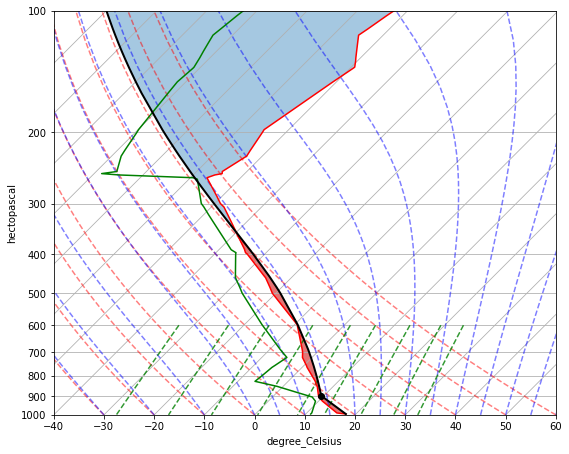

In [6]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot. Because `p`'s first value is
# ~1000 mb and its last value is ~250 mb, the `0` index is selected for
# `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
# i.e. start from low value, 250 mb, to a high value, 1000 mb, the `-1` index
# should be selected.
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, prof)
skew.shade_cape(p, T, prof)
CAPE=skew.shade_cape(p, T, prof)

# An example of a slanted line at constant T -- in this case the 0
# isotherm


# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Show the plot
plt.show()